# LAB 1

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("eye.jpg")

In [3]:
# image = cv2.resize(image,(150,150))

In [4]:
image1 = cv2.resize(image,(224,224))

In [5]:
image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

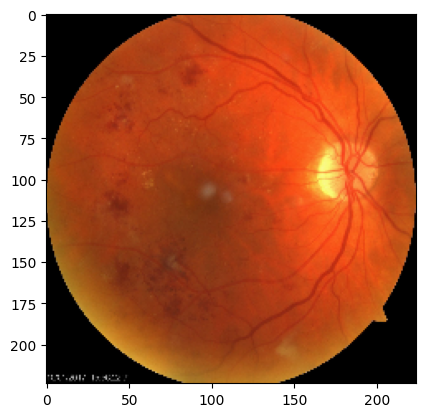

In [6]:
plt.imshow(image2)

In [7]:
lab = cv2.cvtColor(image2,cv2.COLOR_RGB2LAB)
l,a,b = cv2.split(lab)

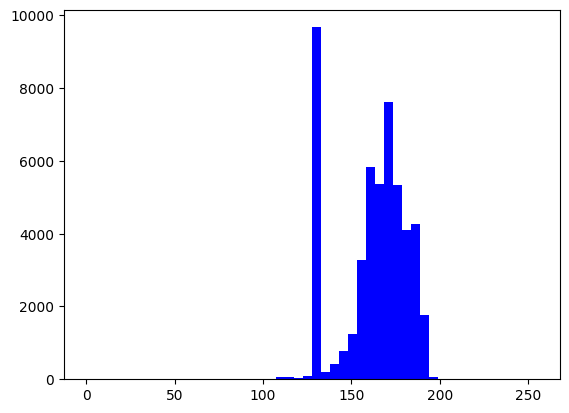

In [8]:
flatten = a.flatten()

plt.hist(flatten,50,[0,255],color="b")
plt.show()

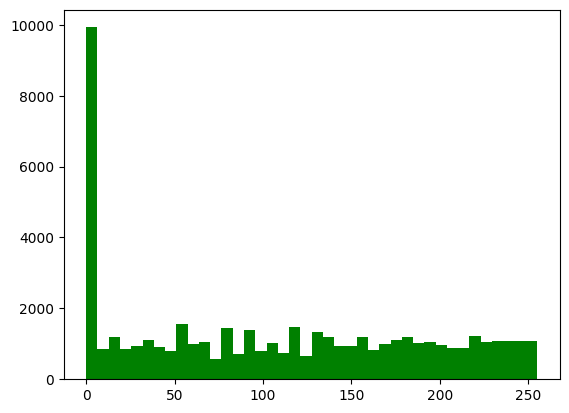

In [9]:
#hisogram equalization
histogram = cv2.equalizeHist(l)
plt.hist(histogram.flatten(),40,[0,255],color="g")
plt.show()

In [10]:
import numpy as np

In [11]:
np.unique(histogram.flatten())

array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  15,  17,
        19,  21,  24,  27,  30,  33,  37,  40,  43,  45,  48,  51,  54,
        57,  60,  63,  66,  70,  73,  77,  82,  87,  91,  95, 100, 107,
       111, 116, 120, 125, 129, 133, 136, 140, 143, 146, 149, 152, 154,
       156, 159, 161, 164, 167, 170, 173, 177, 181, 184, 188, 191, 194,
       197, 200, 203, 206, 209, 212, 214, 217, 219, 222, 224, 226, 228,
       231, 232, 235, 237, 239, 240, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255], dtype=uint8)

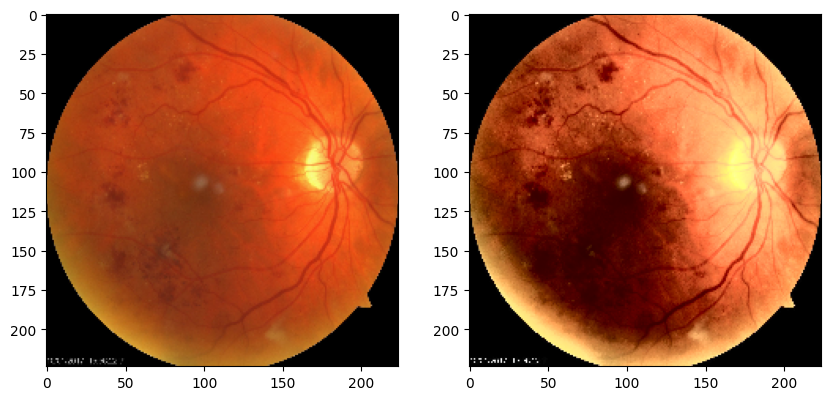

In [12]:
merge1 = cv2.merge((histogram,a,b))
final_img = cv2.cvtColor(merge1,cv2.COLOR_LAB2RGB)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image2)

plt.subplot(1,2,2)
plt.imshow(final_img)

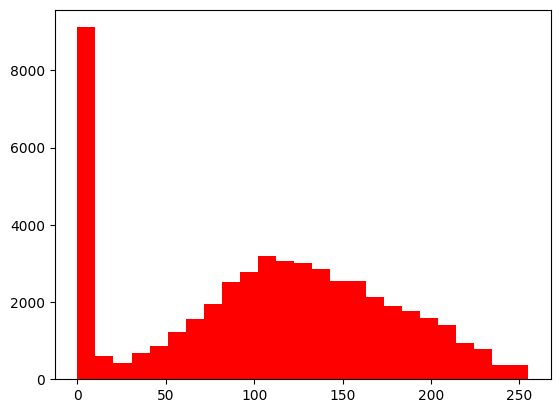

In [13]:
clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=((4,4)))
cl = clahe.apply(l)
plt.hist(cl.flatten(),25,[0,255],color="r")
plt.show()

Text(0.5, 1.0, 'Clahe equalization')

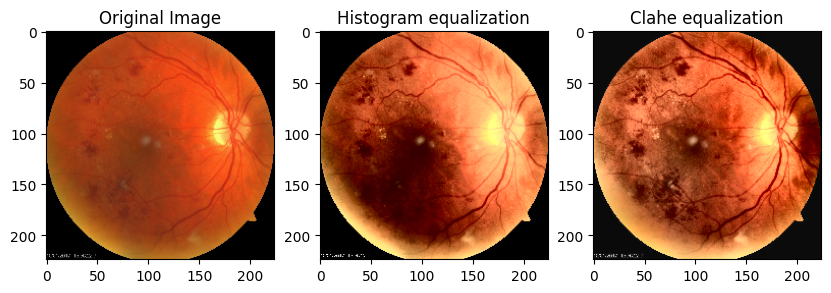

In [14]:
merge2 = cv2.merge((cl,a,b))
final_img2 = cv2.cvtColor(merge2,cv2.COLOR_LAB2RGB)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image2)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(final_img)
plt.title("Histogram equalization")

plt.subplot(1,3,3)
plt.imshow(final_img2)
plt.title("Clahe equalization")

In [15]:
def contrastEql(img_file):
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    lab = cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(lab)

    #hisogram equalization
    histogram = cv2.equalizeHist(l)
    merge1 = cv2.merge((histogram,a,b))
    final_img1 = cv2.cvtColor(merge1,cv2.COLOR_LAB2RGB)
    
    #clahe method
    clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=((4,4)))
    cl = clahe.apply(l)
    
    merge2 = cv2.merge((cl,a,b))
    final_img2 = cv2.cvtColor(merge2,cv2.COLOR_LAB2RGB)

    plt.figure(figsize=(10,10))
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    
    plt.subplot(1,3,2)
    plt.imshow(final_img1)
    plt.title("Histogram equalization")
    
    plt.subplot(1,3,3)
    plt.imshow(final_img2)
    plt.title("Clahe equalization")

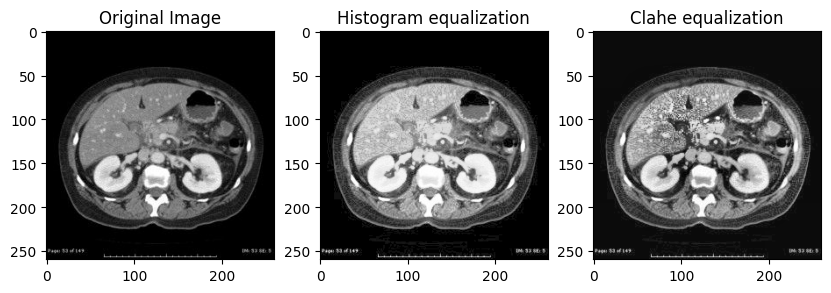

In [16]:
contrastEql("brain.jpg")

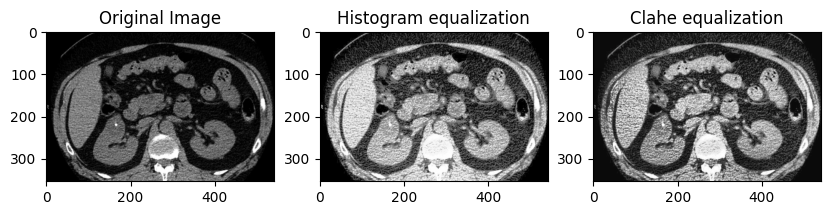

In [17]:
contrastEql("brain2.jpg")

# LAB 2

## Low Pass Filters

(-0.5, 223.5, 223.5, -0.5)

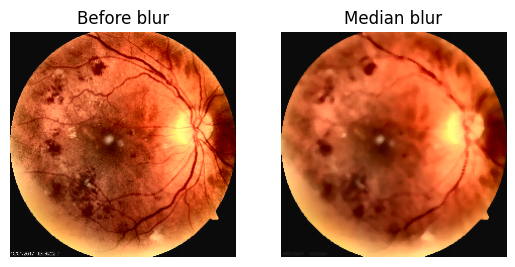

In [99]:
med_blur = cv2.medianBlur(final_img2,5)

plt.subplot(1,2,1)
plt.imshow(final_img2)
plt.title("Before blur")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(med_blur)
plt.title("Median blur")
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

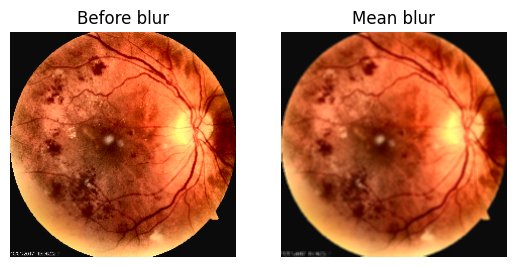

In [100]:
mean_blur = cv2.blur(final_img2,(3,3))

plt.subplot(1,2,1)
plt.imshow(final_img2)
plt.title("Before blur")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mean_blur)
plt.title("Mean blur")
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

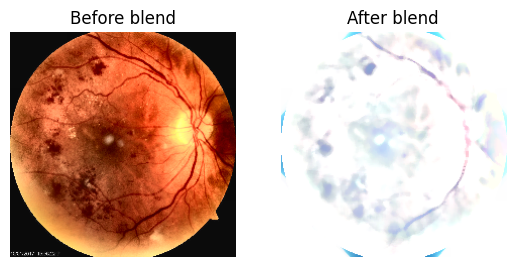

In [101]:
back_ground = cv2.medianBlur(final_img2,57)
mask = cv2.addWeighted(med_blur,1,back_ground,-1,255)

plt.subplot(1,2,1)
plt.imshow(final_img2)
plt.title("Before blend")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask)
plt.title("After blend")
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

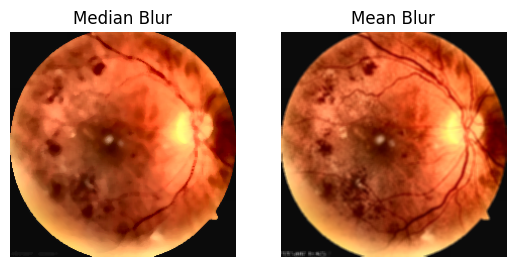

In [102]:
plt.subplot(1,2,1)
plt.imshow(med_blur)
plt.axis("off")
plt.title("Median Blur")

plt.subplot(1,2,2)
plt.imshow(mean_blur)
plt.title("Mean Blur")
plt.axis("off")

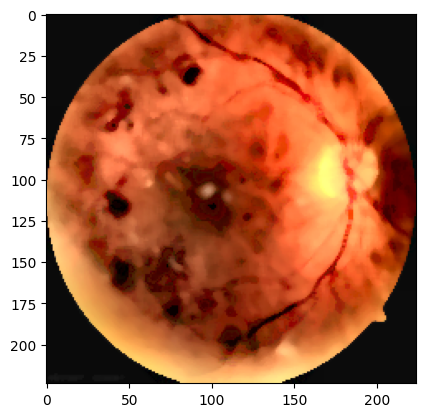

In [97]:
final_mask = cv2.bitwise_and(mask,med_blur)
plt.imshow(final_mask)

In [75]:
# final_mask = cv2.cvtColor(final_mask,cv2.COLOR_BGR2RGB)
# plt.imshow(final_mask)

In [84]:
import math
from math import log10,sqrt

In [87]:
def PSNR(orig,filter):
    mse = np.mean((orig-filter)**2)
    if(mse==0):
        return 100

    max_pix = 255.0
    psnr = 20*log10(max_pix/sqrt(mse))

    return psnr

In [95]:
print("PSNR for med_blur: ",psnr(final_img2,med_blur))
print("PSNR for mean_blur: ",psnr(final_img2,mean_blur))

PSNR for med_blur:  31.991248189620954
PSNR for mean_blur:  31.971438199843874


In [96]:
print("PSNR for final_mask: ",psnr(final_img2,final_mask))

PSNR for final_mask:  31.627896583683214


## High Pass Filter

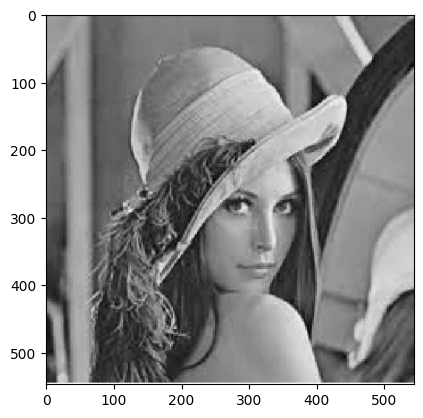

In [107]:
girl = cv2.imread("girl.jpg")
girl = cv2.cvtColor(nature,cv2.COLOR_BGR2RGB)
plt.imshow(nature)

(-0.5, 543.5, 546.5, -0.5)

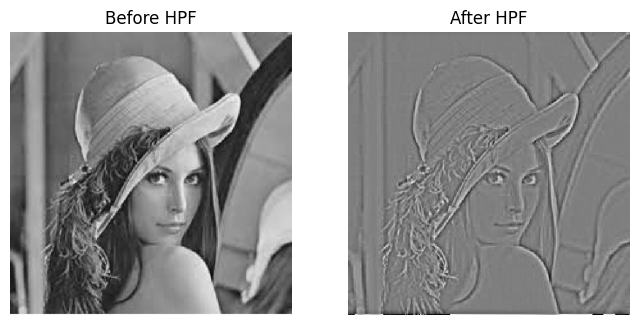

In [120]:
hpf = girl - cv2.GaussianBlur(girl,(21,21),5) + 127

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(girl)
plt.title("Before HPF")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(hpf)
plt.title("After HPF")
plt.axis("off")